# Plotting data using Seaborn
Dataset - https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

Seaborn - https://seaborn.pydata.org/tutorial.html#

In [1]:
import pandas as pd

#import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# 1. Loading the data from a csv file
df = pd.read_csv("brain_stroke.csv")

In [3]:
# 2. Shape of a dataframe
df.shape

(4981, 11)

In [4]:
# 3. Head of the data frame
df.head(n=10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [5]:
# 4. data types of the columns
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
# Checking na values in columns
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Creating a scatterplot
- x : variable on the x-axis
- y : variable on the y-axis
- data : dataframe
- hue : variable to be used for color
- style : variable to be used for marker style
- legend : control legend position

<Axes: xlabel='age', ylabel='avg_glucose_level'>

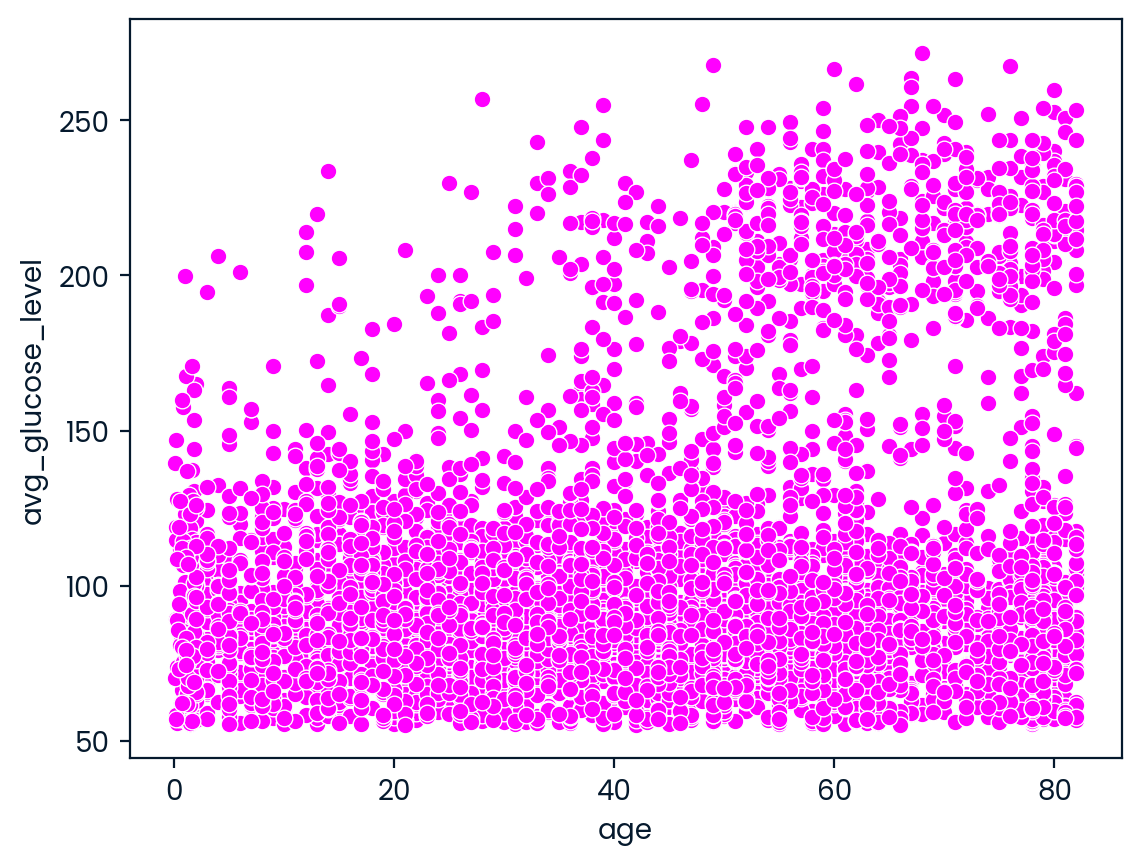

In [7]:
sns.scatterplot(x = 'age', y = 'avg_glucose_level', data = df, color = 'magenta')

### Scatterplot with hue, style and legend adjustment

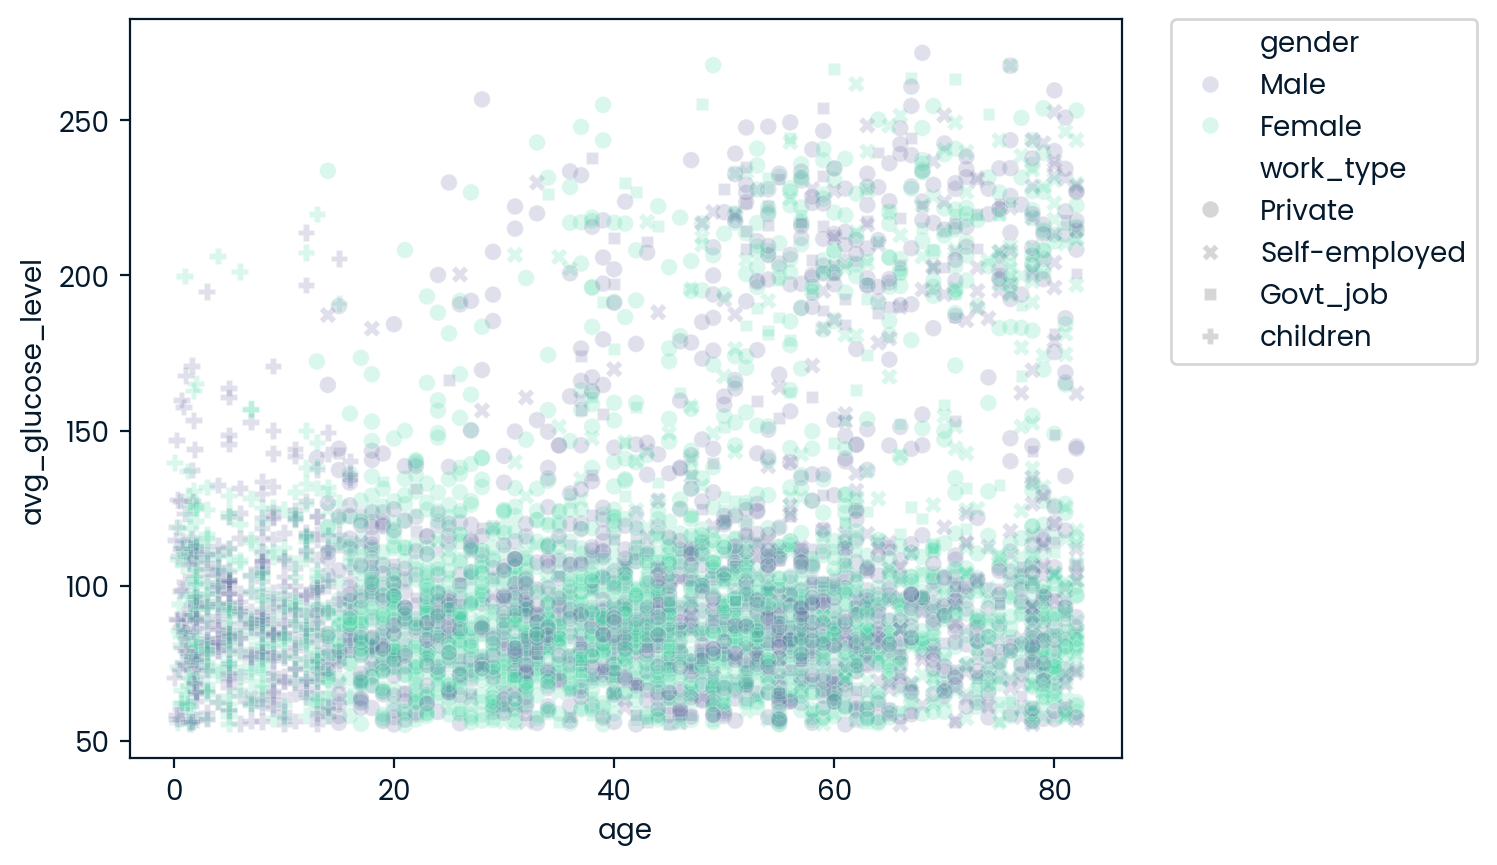

In [26]:
sns.scatterplot(x = 'age', y = 'avg_glucose_level', data = df, alpha = 0.2, hue='gender', style='work_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Creating a barplot
- x : categorical variable
- y : numeric value (***mean is calculated by default***)
- data : dataframe
- color : bar color
- hue : variable to be used for color

<Axes: xlabel='work_type', ylabel='bmi'>

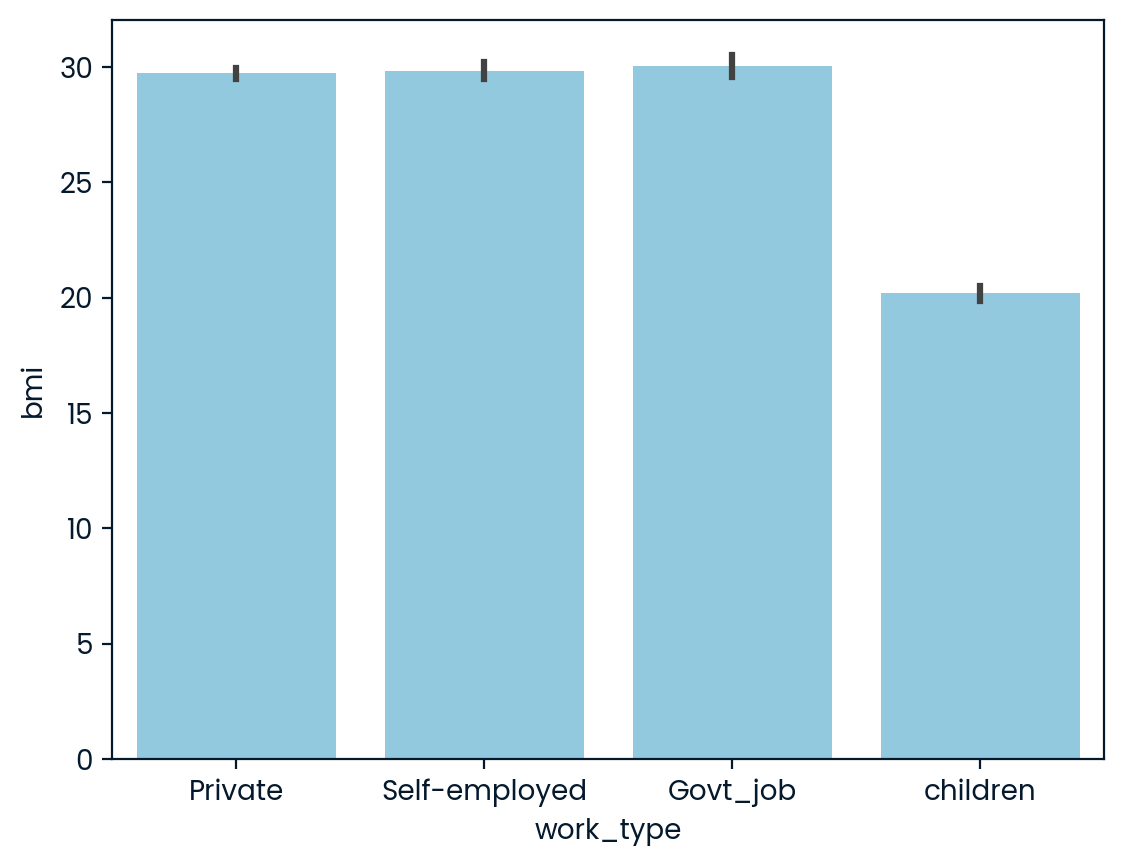

In [9]:
sns.barplot(x = 'work_type', y = 'bmi', data = df, color = 'skyblue')

### Horizontal barplot with x and y axis changed and orient = 'h

<Axes: xlabel='bmi', ylabel='work_type'>

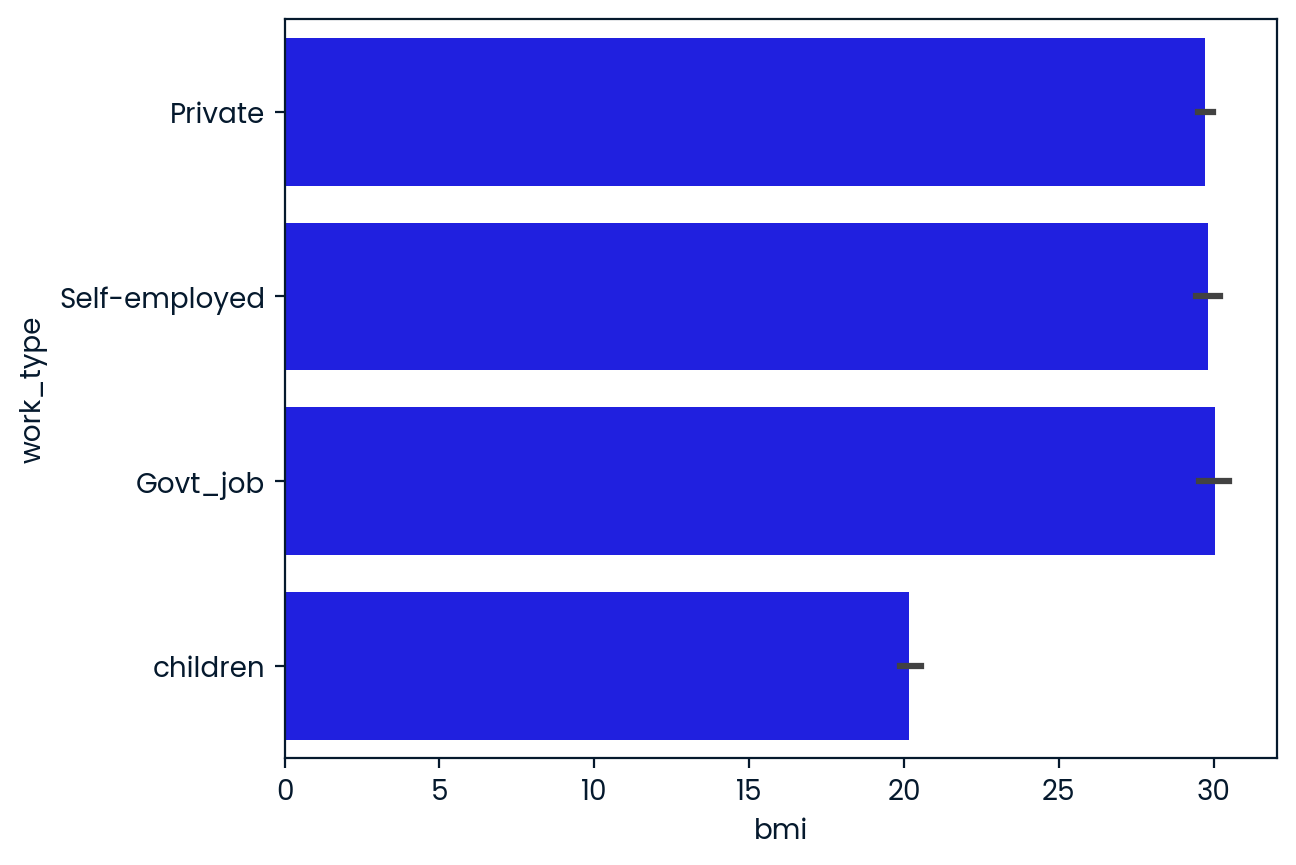

In [10]:
sns.barplot(x = 'bmi', y = 'work_type', data = df, color = 'blue', orient = 'h')

### Barplot with hue, style and legend adjustment

<Axes: xlabel='work_type', ylabel='bmi'>

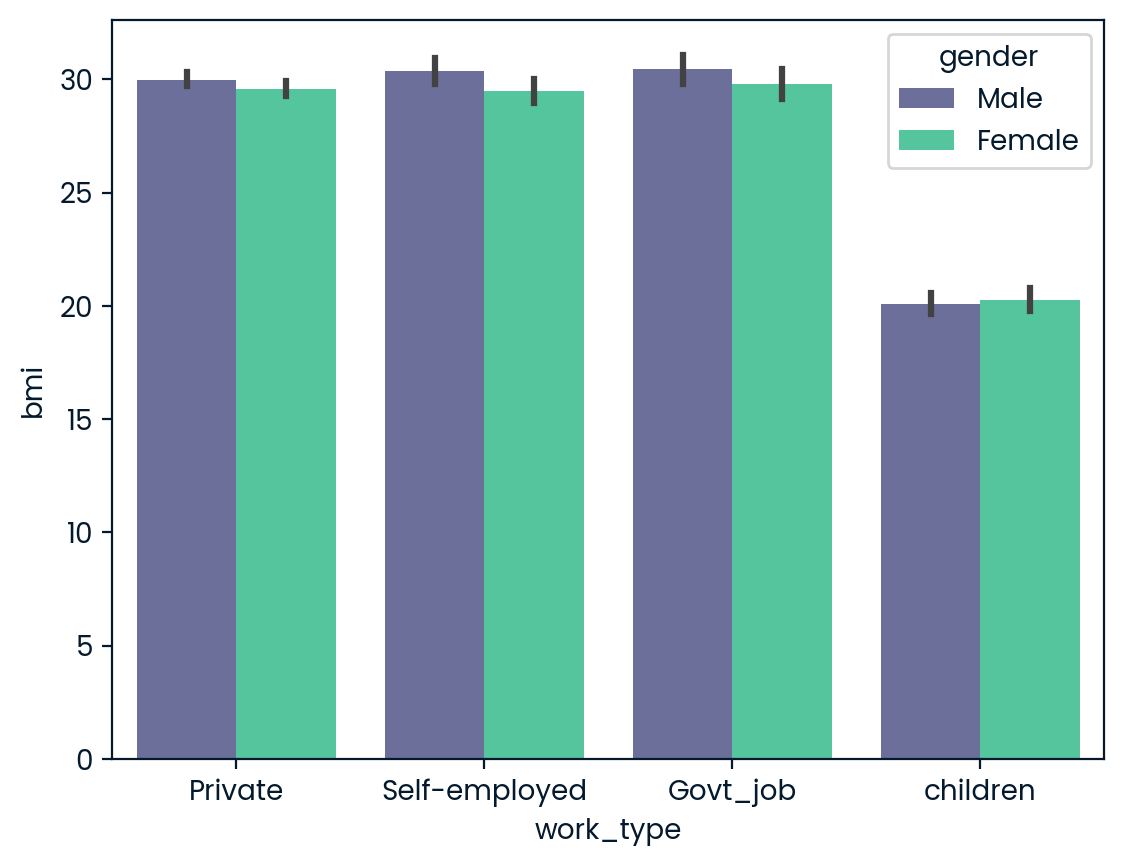

In [11]:
sns.barplot(x = 'work_type', y = 'bmi', data = df, hue = 'gender')

# Adding label, title to the plot
- plt.xlabel - text for xlable
- plt.ylable - text for y lable
- plt.title - text for title

Text(0.5, 1.0, 'Hypertension % in Gender by Smoking Status')

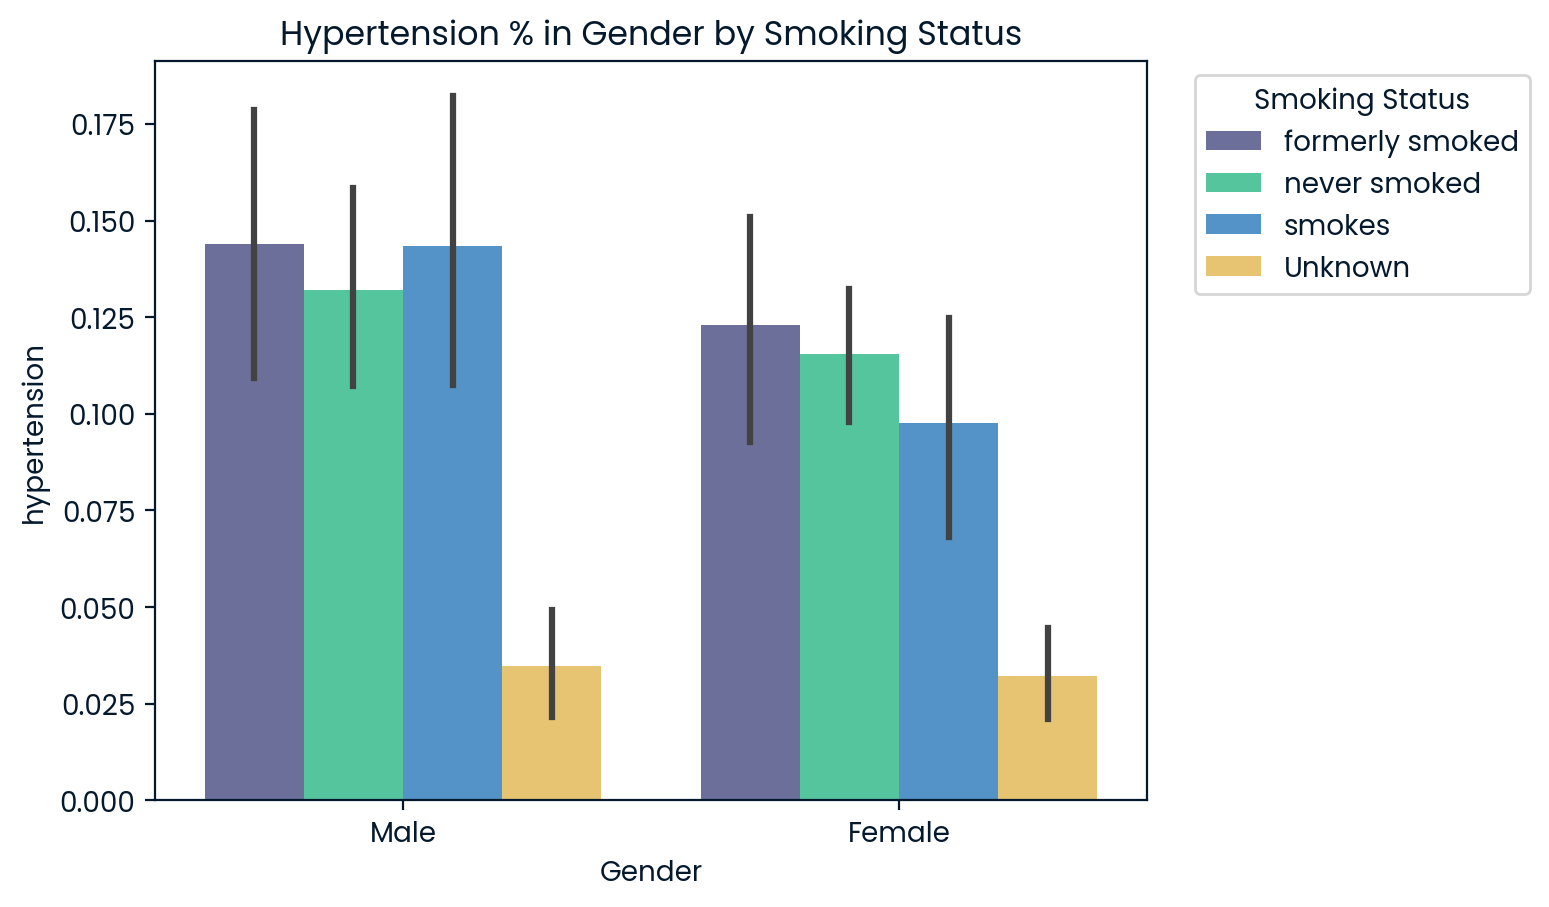

In [12]:
sns.barplot(x = 'gender', y = 'hypertension', data = df, hue = 'smoking_status')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', title='Smoking Status')
plt.xlabel('Gender')
plt.title('Hypertension % in Gender by Smoking Status')

### Heart Disease % in patients with Hypertension by Gender

Text(0.5, 1.0, 'Heart Disease % in Gender by Hypertension')

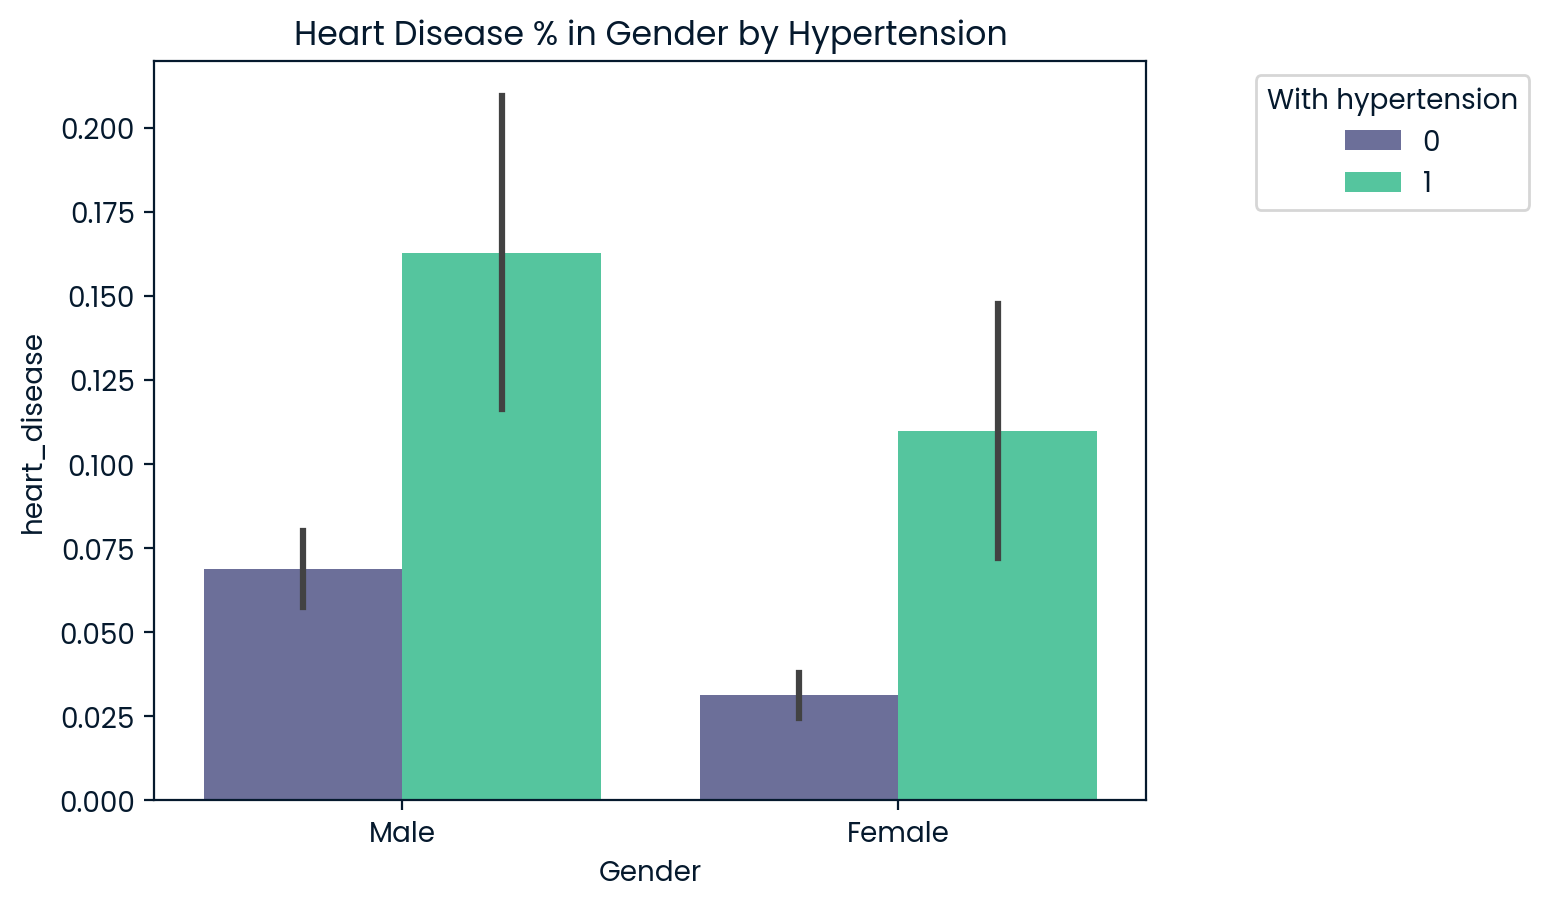

In [13]:
sns.barplot(x = 'gender', y = 'heart_disease', data = df, hue = 'hypertension')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', title='With hypertension')
plt.xlabel('Gender')
plt.title('Heart Disease % in Gender by Hypertension')

# Plotting barplots with summary other than mean
- Summarise the data using groupby
- plot the sumamrised data

Text(0.5, 1.0, 'Sum of avg_glucose_level by work_type and gender')

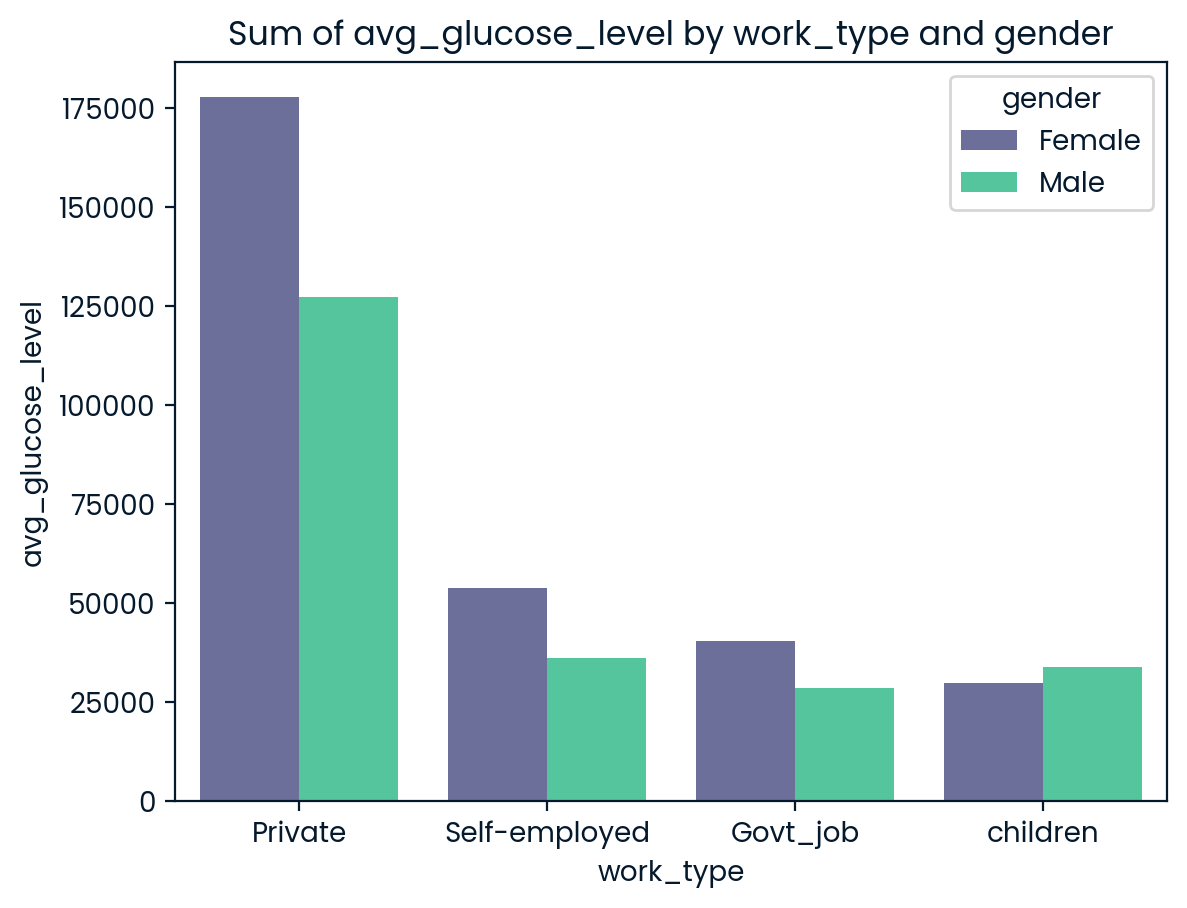

In [14]:
df_summ = df.groupby(['work_type', 'gender'], as_index=False)['avg_glucose_level'].agg('sum').sort_values(by='avg_glucose_level', ascending = False)

sns.barplot(x = 'work_type', y = 'avg_glucose_level', data = df_summ, hue = 'gender')
plt.title('Sum of avg_glucose_level by work_type and gender')

Text(0.5, 1.0, 'Count by work_type and gender')

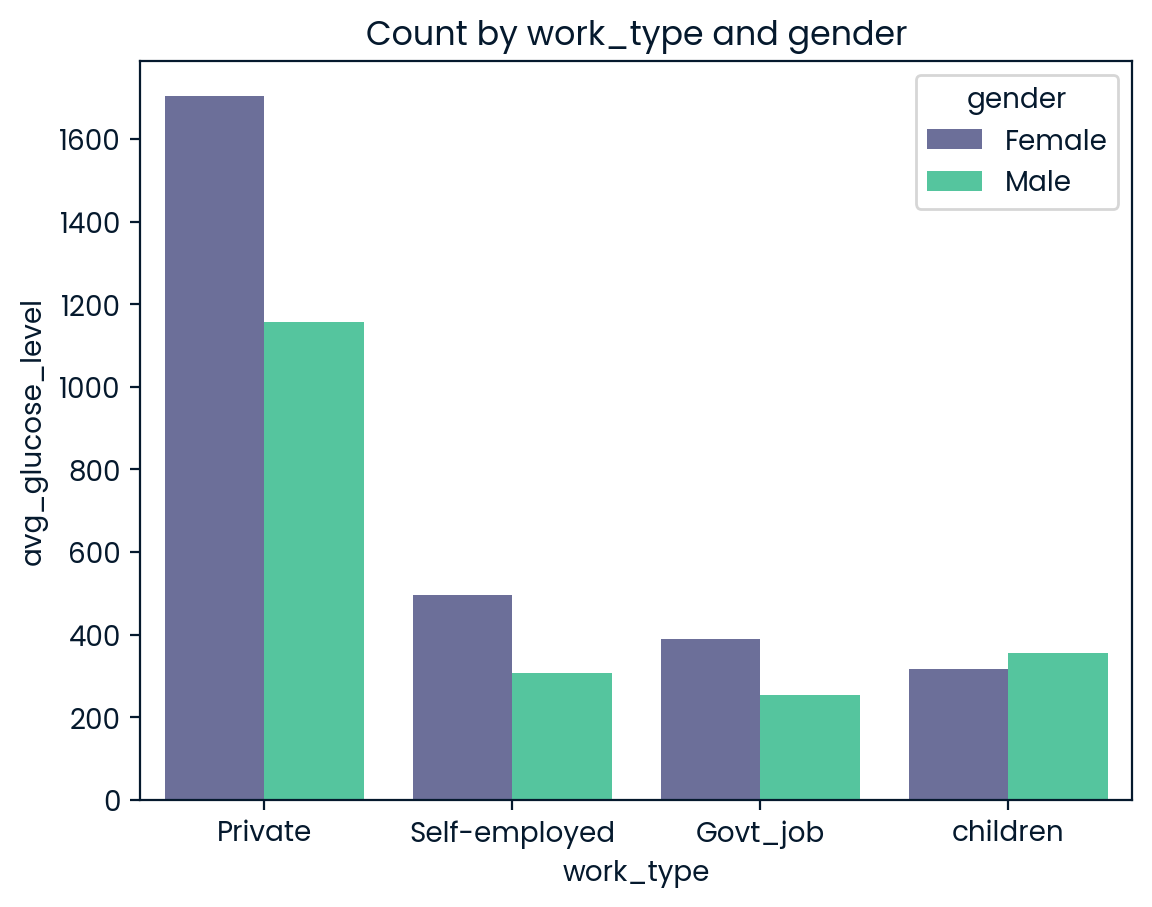

In [15]:
df_summ = df.groupby(['work_type', 'gender'], as_index=False)['avg_glucose_level'].agg('count').sort_values(by='avg_glucose_level', ascending = False)

sns.barplot(x = 'work_type', y = 'avg_glucose_level', data = df_summ, hue = 'gender')
plt.title('Count by work_type and gender')

# Creating a box plot
- x : categorical variable
- y : numeric variable
- kind : 'box', 'swarm' etc.
- data : dataframe

Text(0.5, 1.0, 'Distribution of avg_glucose_level by hypertension')

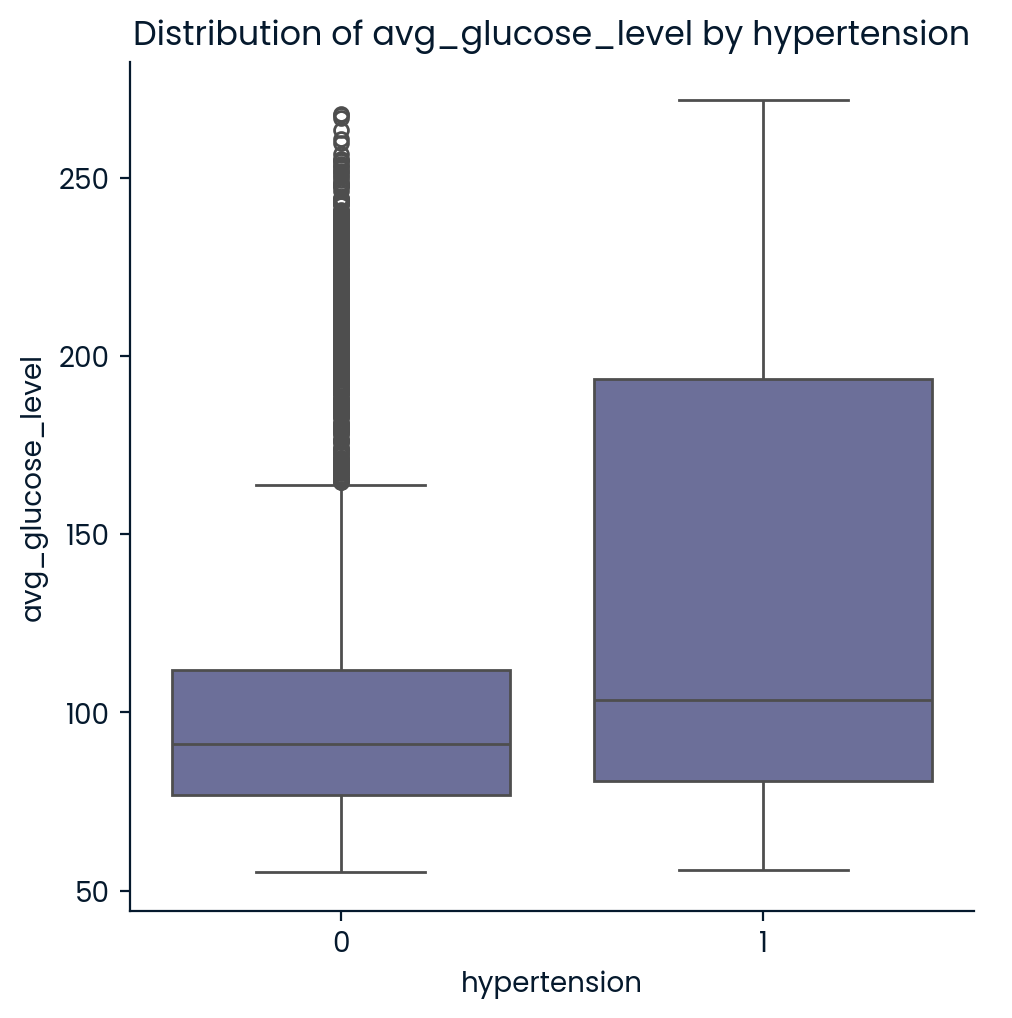

In [16]:
sns.catplot(x='hypertension', y='avg_glucose_level', kind = 'box', data=df)
plt.title('Distribution of avg_glucose_level by hypertension')

# Box plot with facets
- col : facets in columns
- row : facets in rows

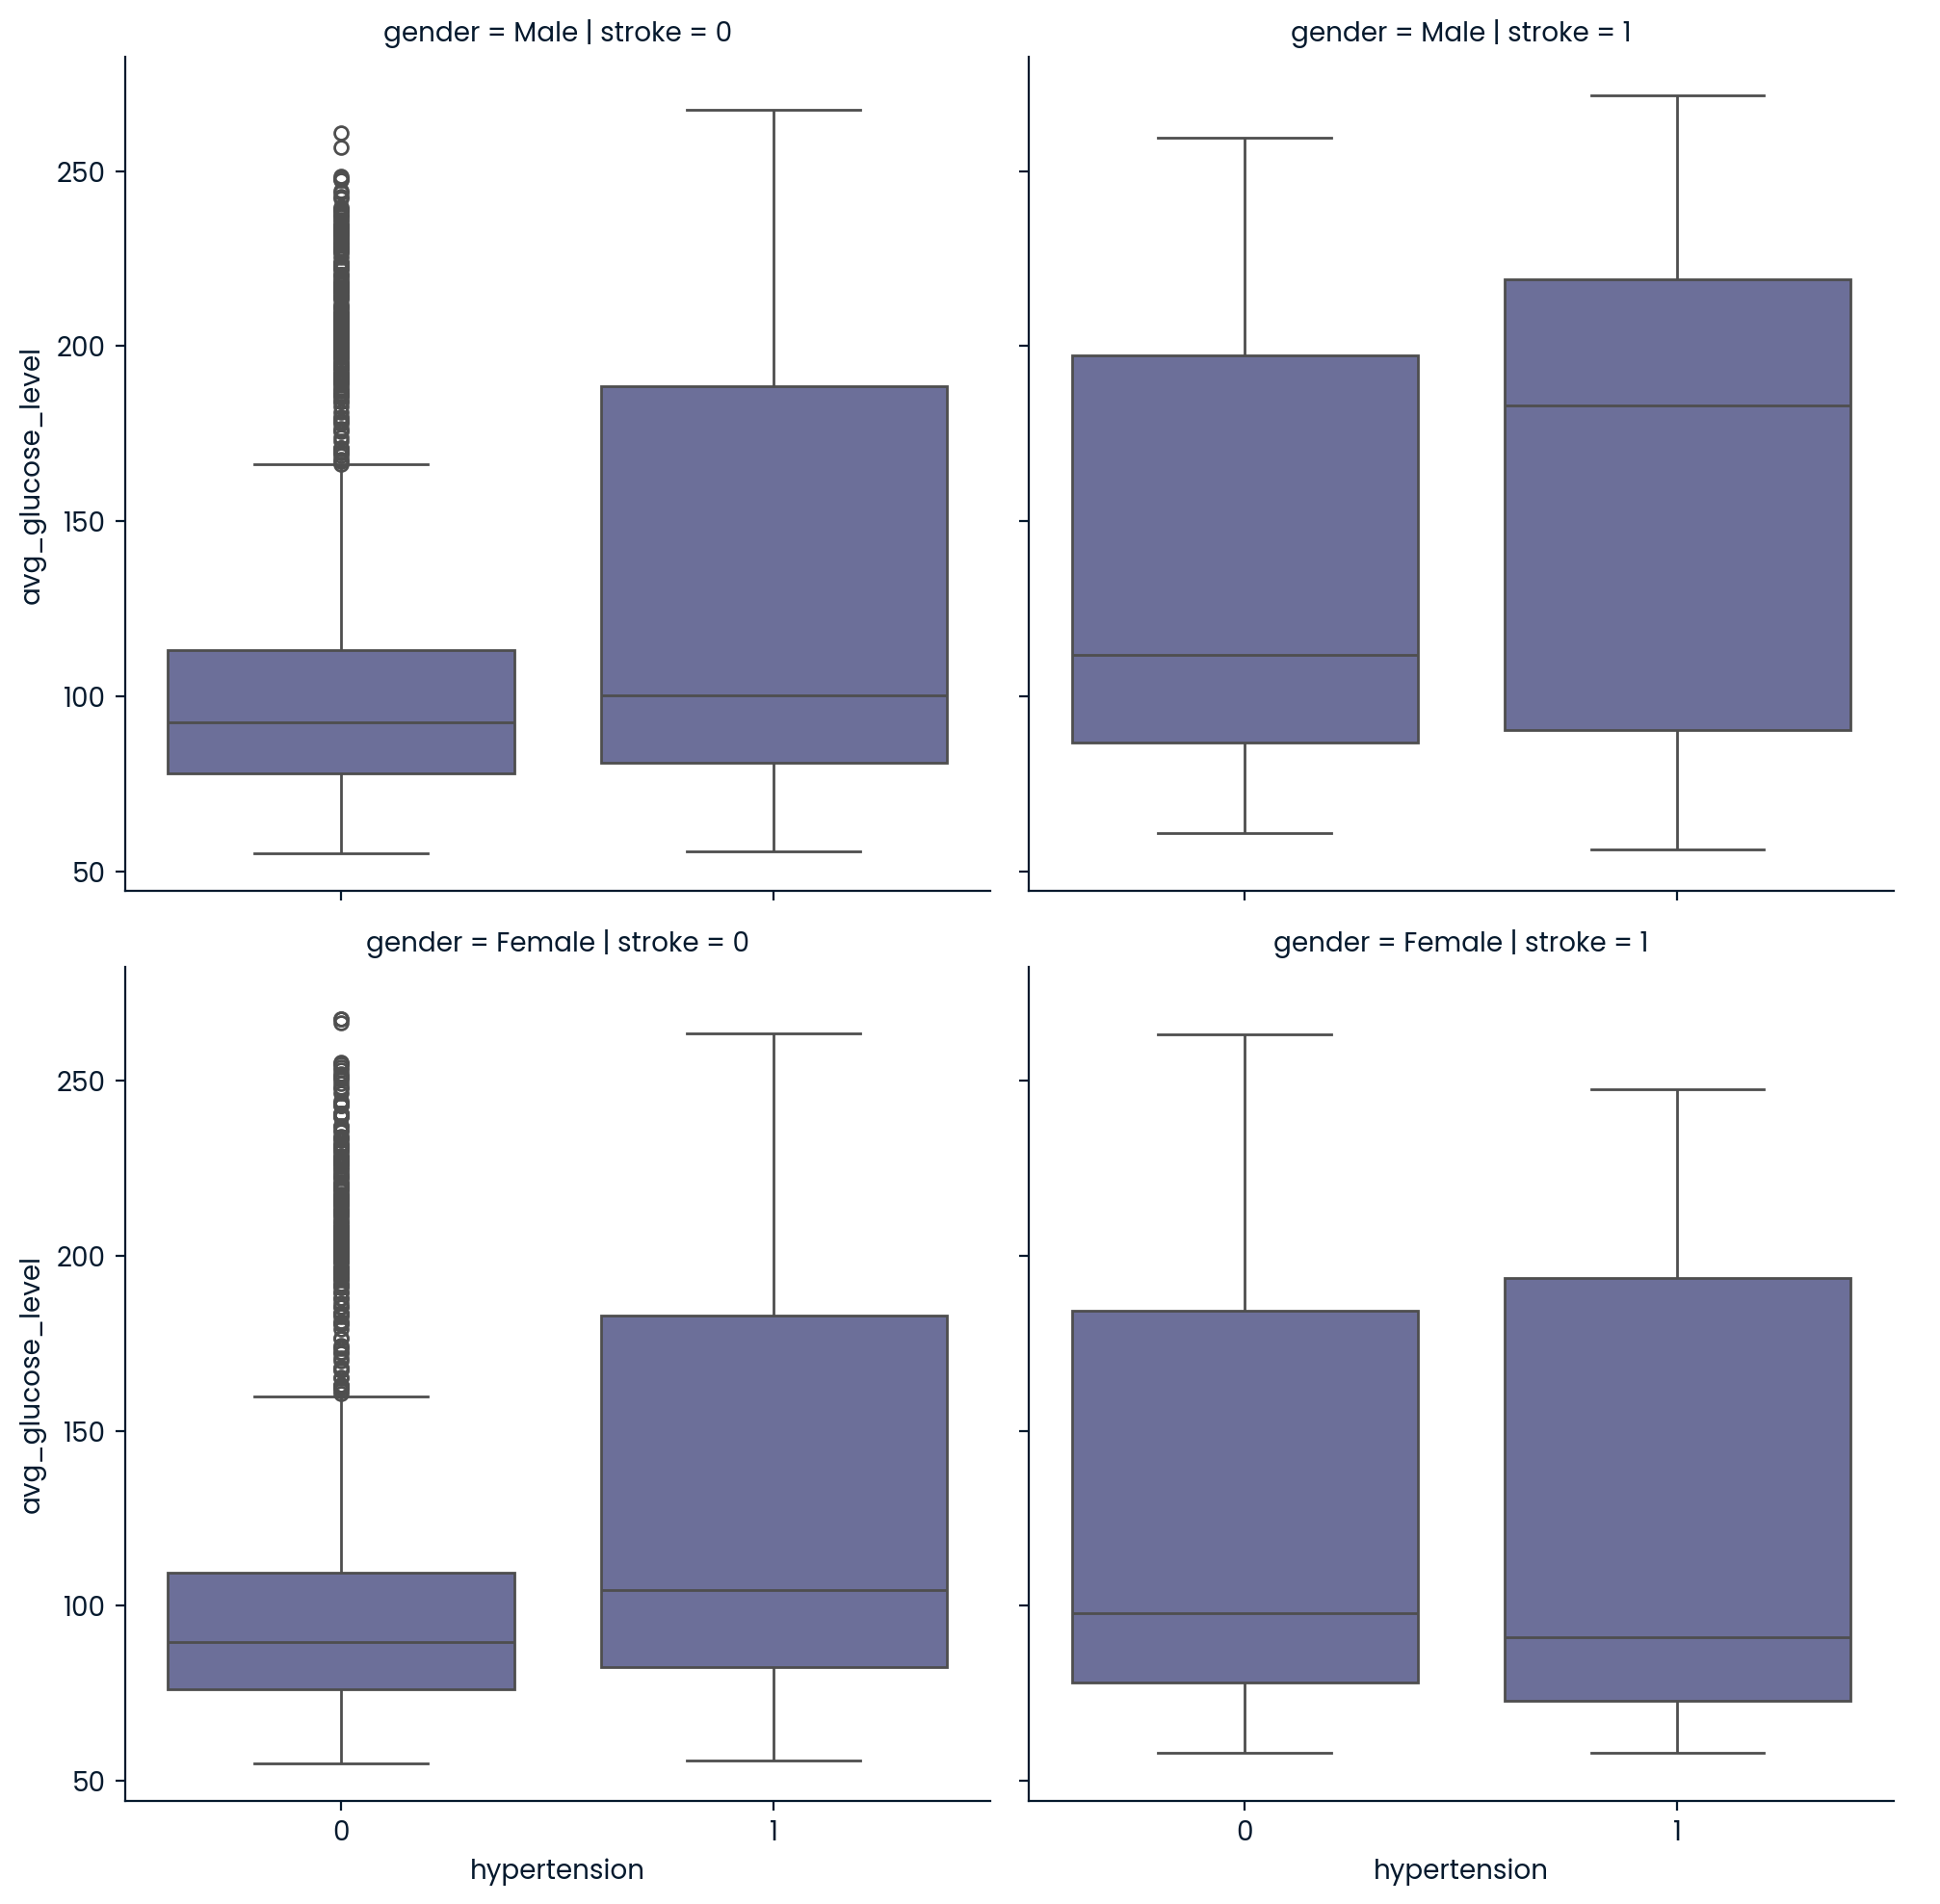

In [17]:
sns.catplot(x='hypertension', y='avg_glucose_level', kind = 'box', data=df, col = 'stroke', row = 'gender')

# Histogram
- sns.histplot(data = df, x = 'variable', bins = n)
- sns.displot(data = df, x = 'variable', kind = 'hist', bins = n)
- hue : variable for color
- binwidth : width of the bin (either bins or binwidth is to be used)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

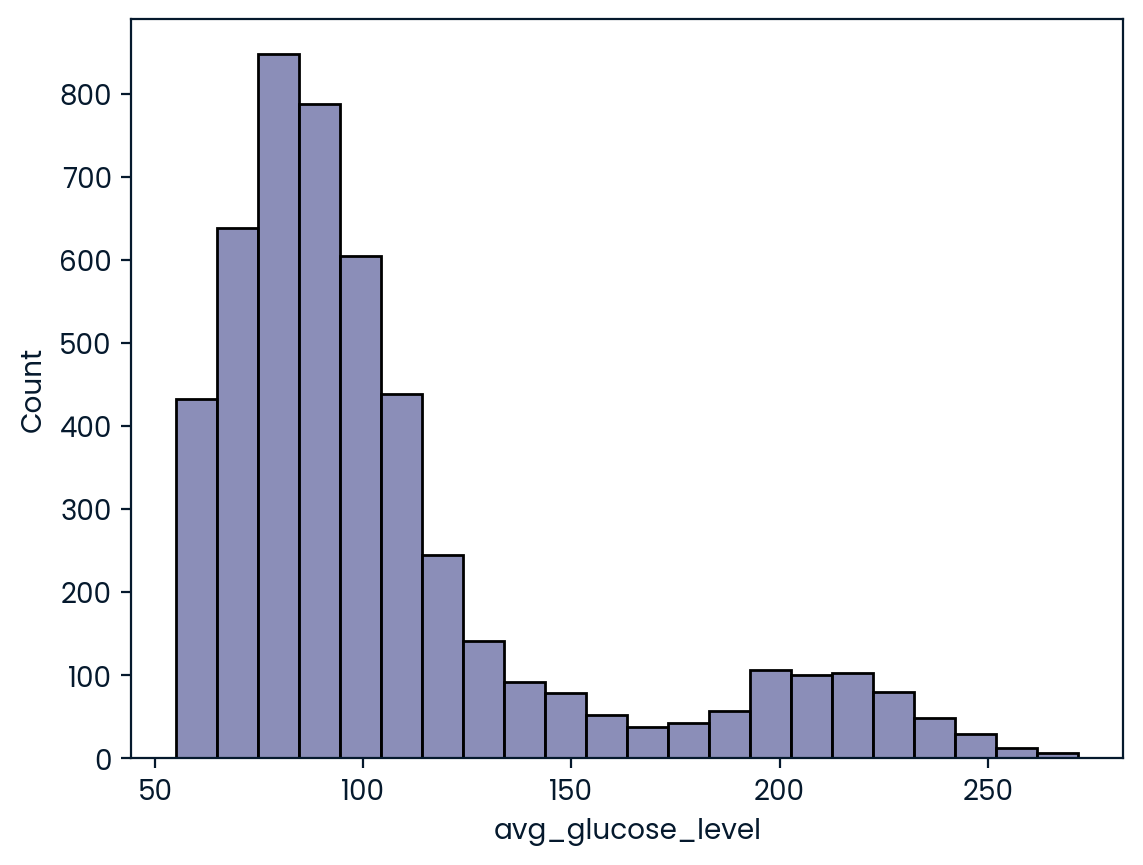

In [27]:
sns.histplot(data = df, x = 'avg_glucose_level', binwidth = 10)

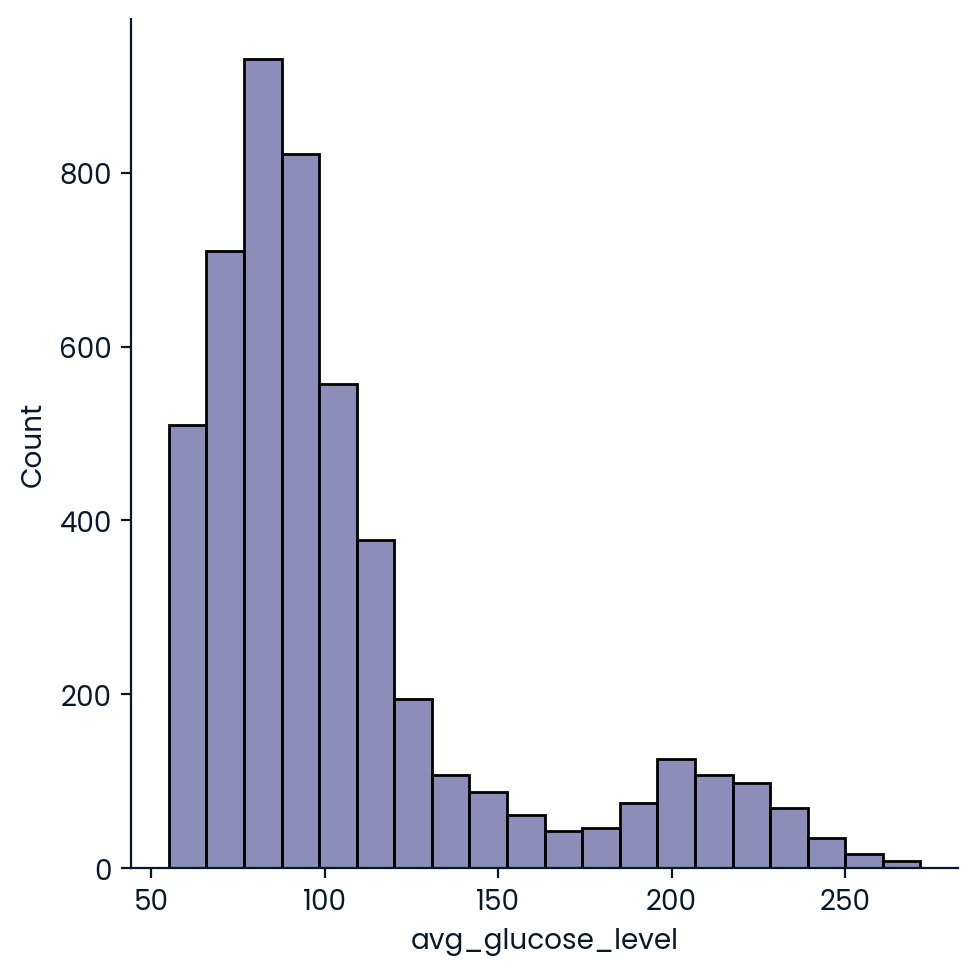

In [19]:
sns.displot(data = df, x = 'avg_glucose_level', kind = 'hist', bins = 20)

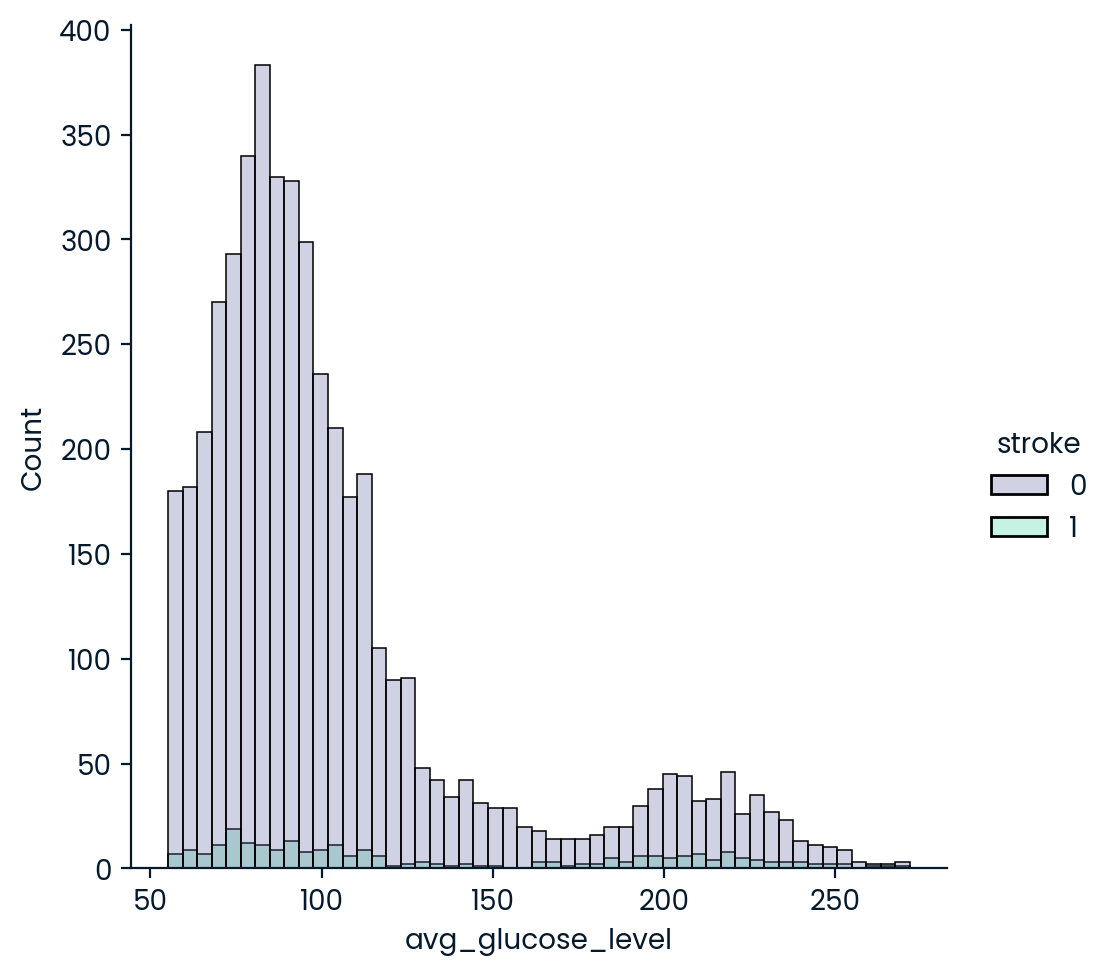

In [20]:
sns.displot(data = df, x = 'avg_glucose_level', kind = 'hist', hue = 'stroke', alpha = 0.3)

# Density plot
- sns.kdeplot(data = df, x = 'variable')
- sns.displot(data = df, x = 'variable', kind = 'kde')
- hue : variable for color

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

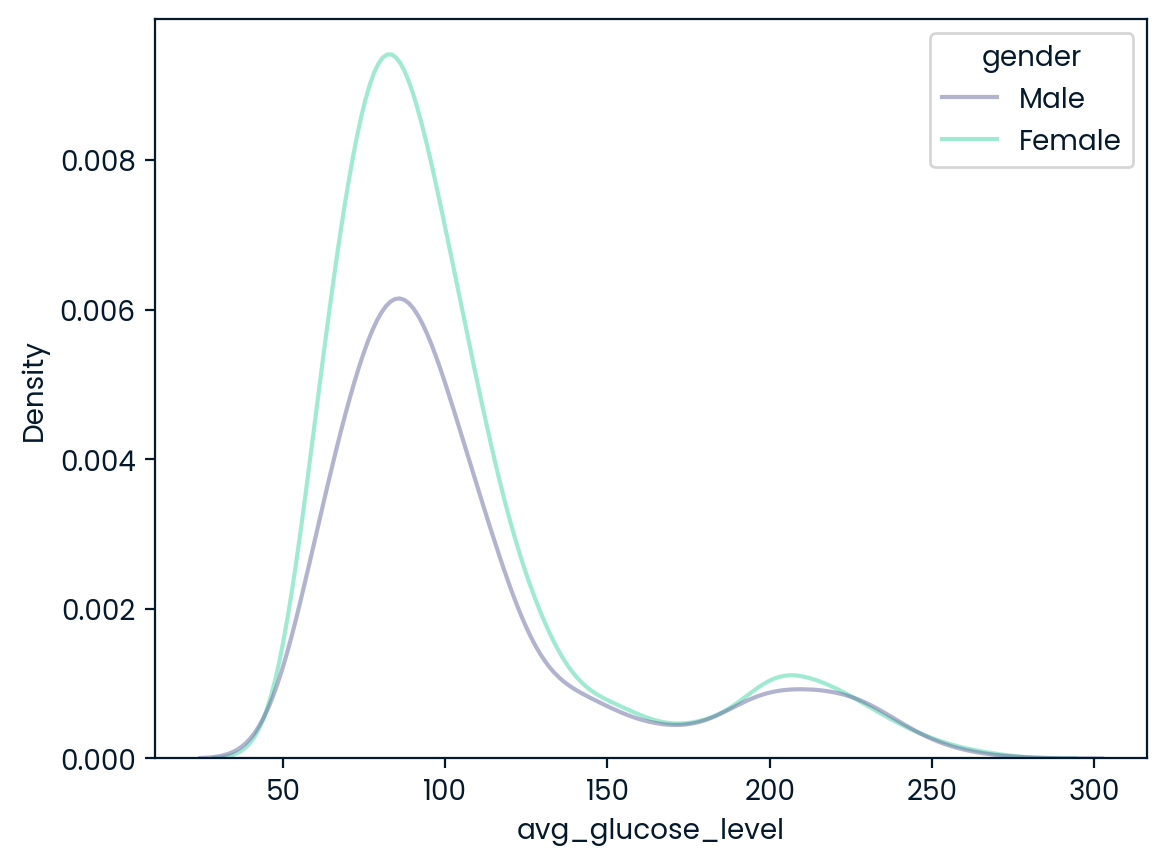

In [21]:
sns.kdeplot(data = df, x = 'avg_glucose_level', hue='gender', alpha = 0.5)

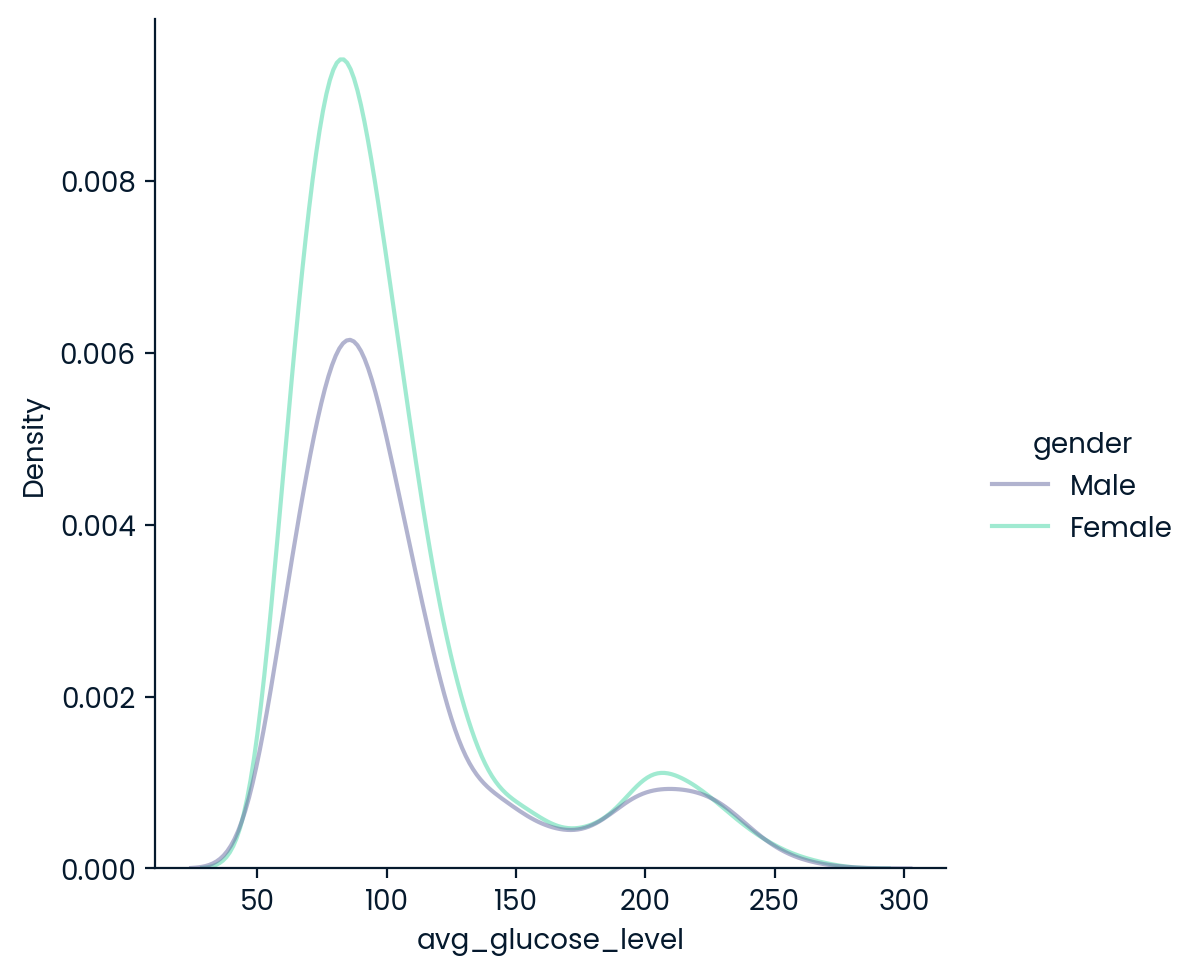

In [22]:
sns.displot(data = df, x = 'avg_glucose_level', kind = 'kde', hue='gender', alpha = 0.5)

# Jointplot

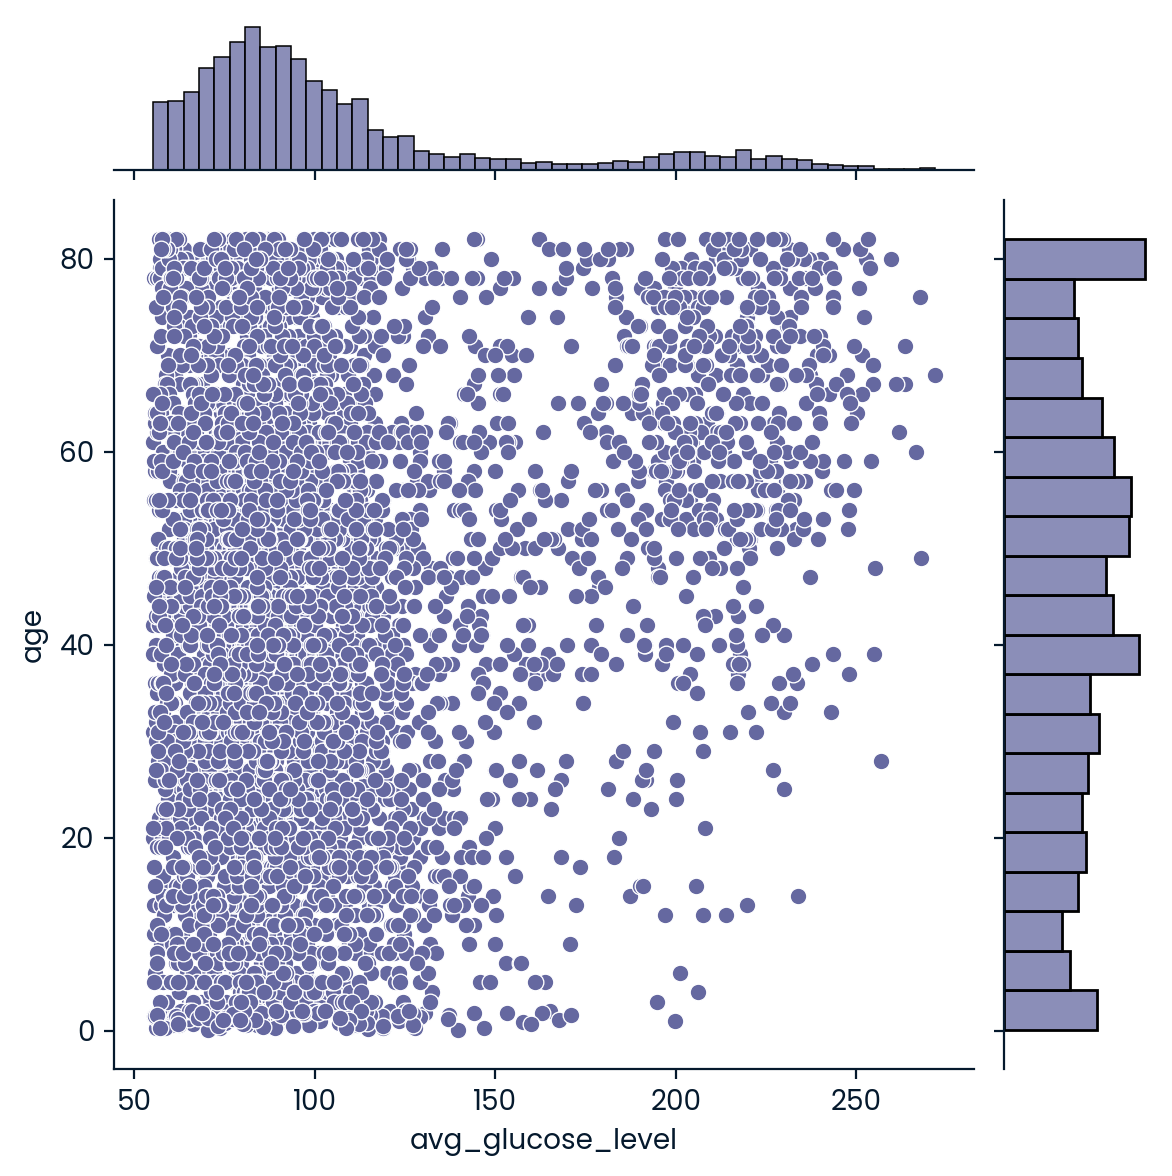

In [23]:
sns.jointplot(data = df, x = 'avg_glucose_level', y = 'age')

# Pairplot

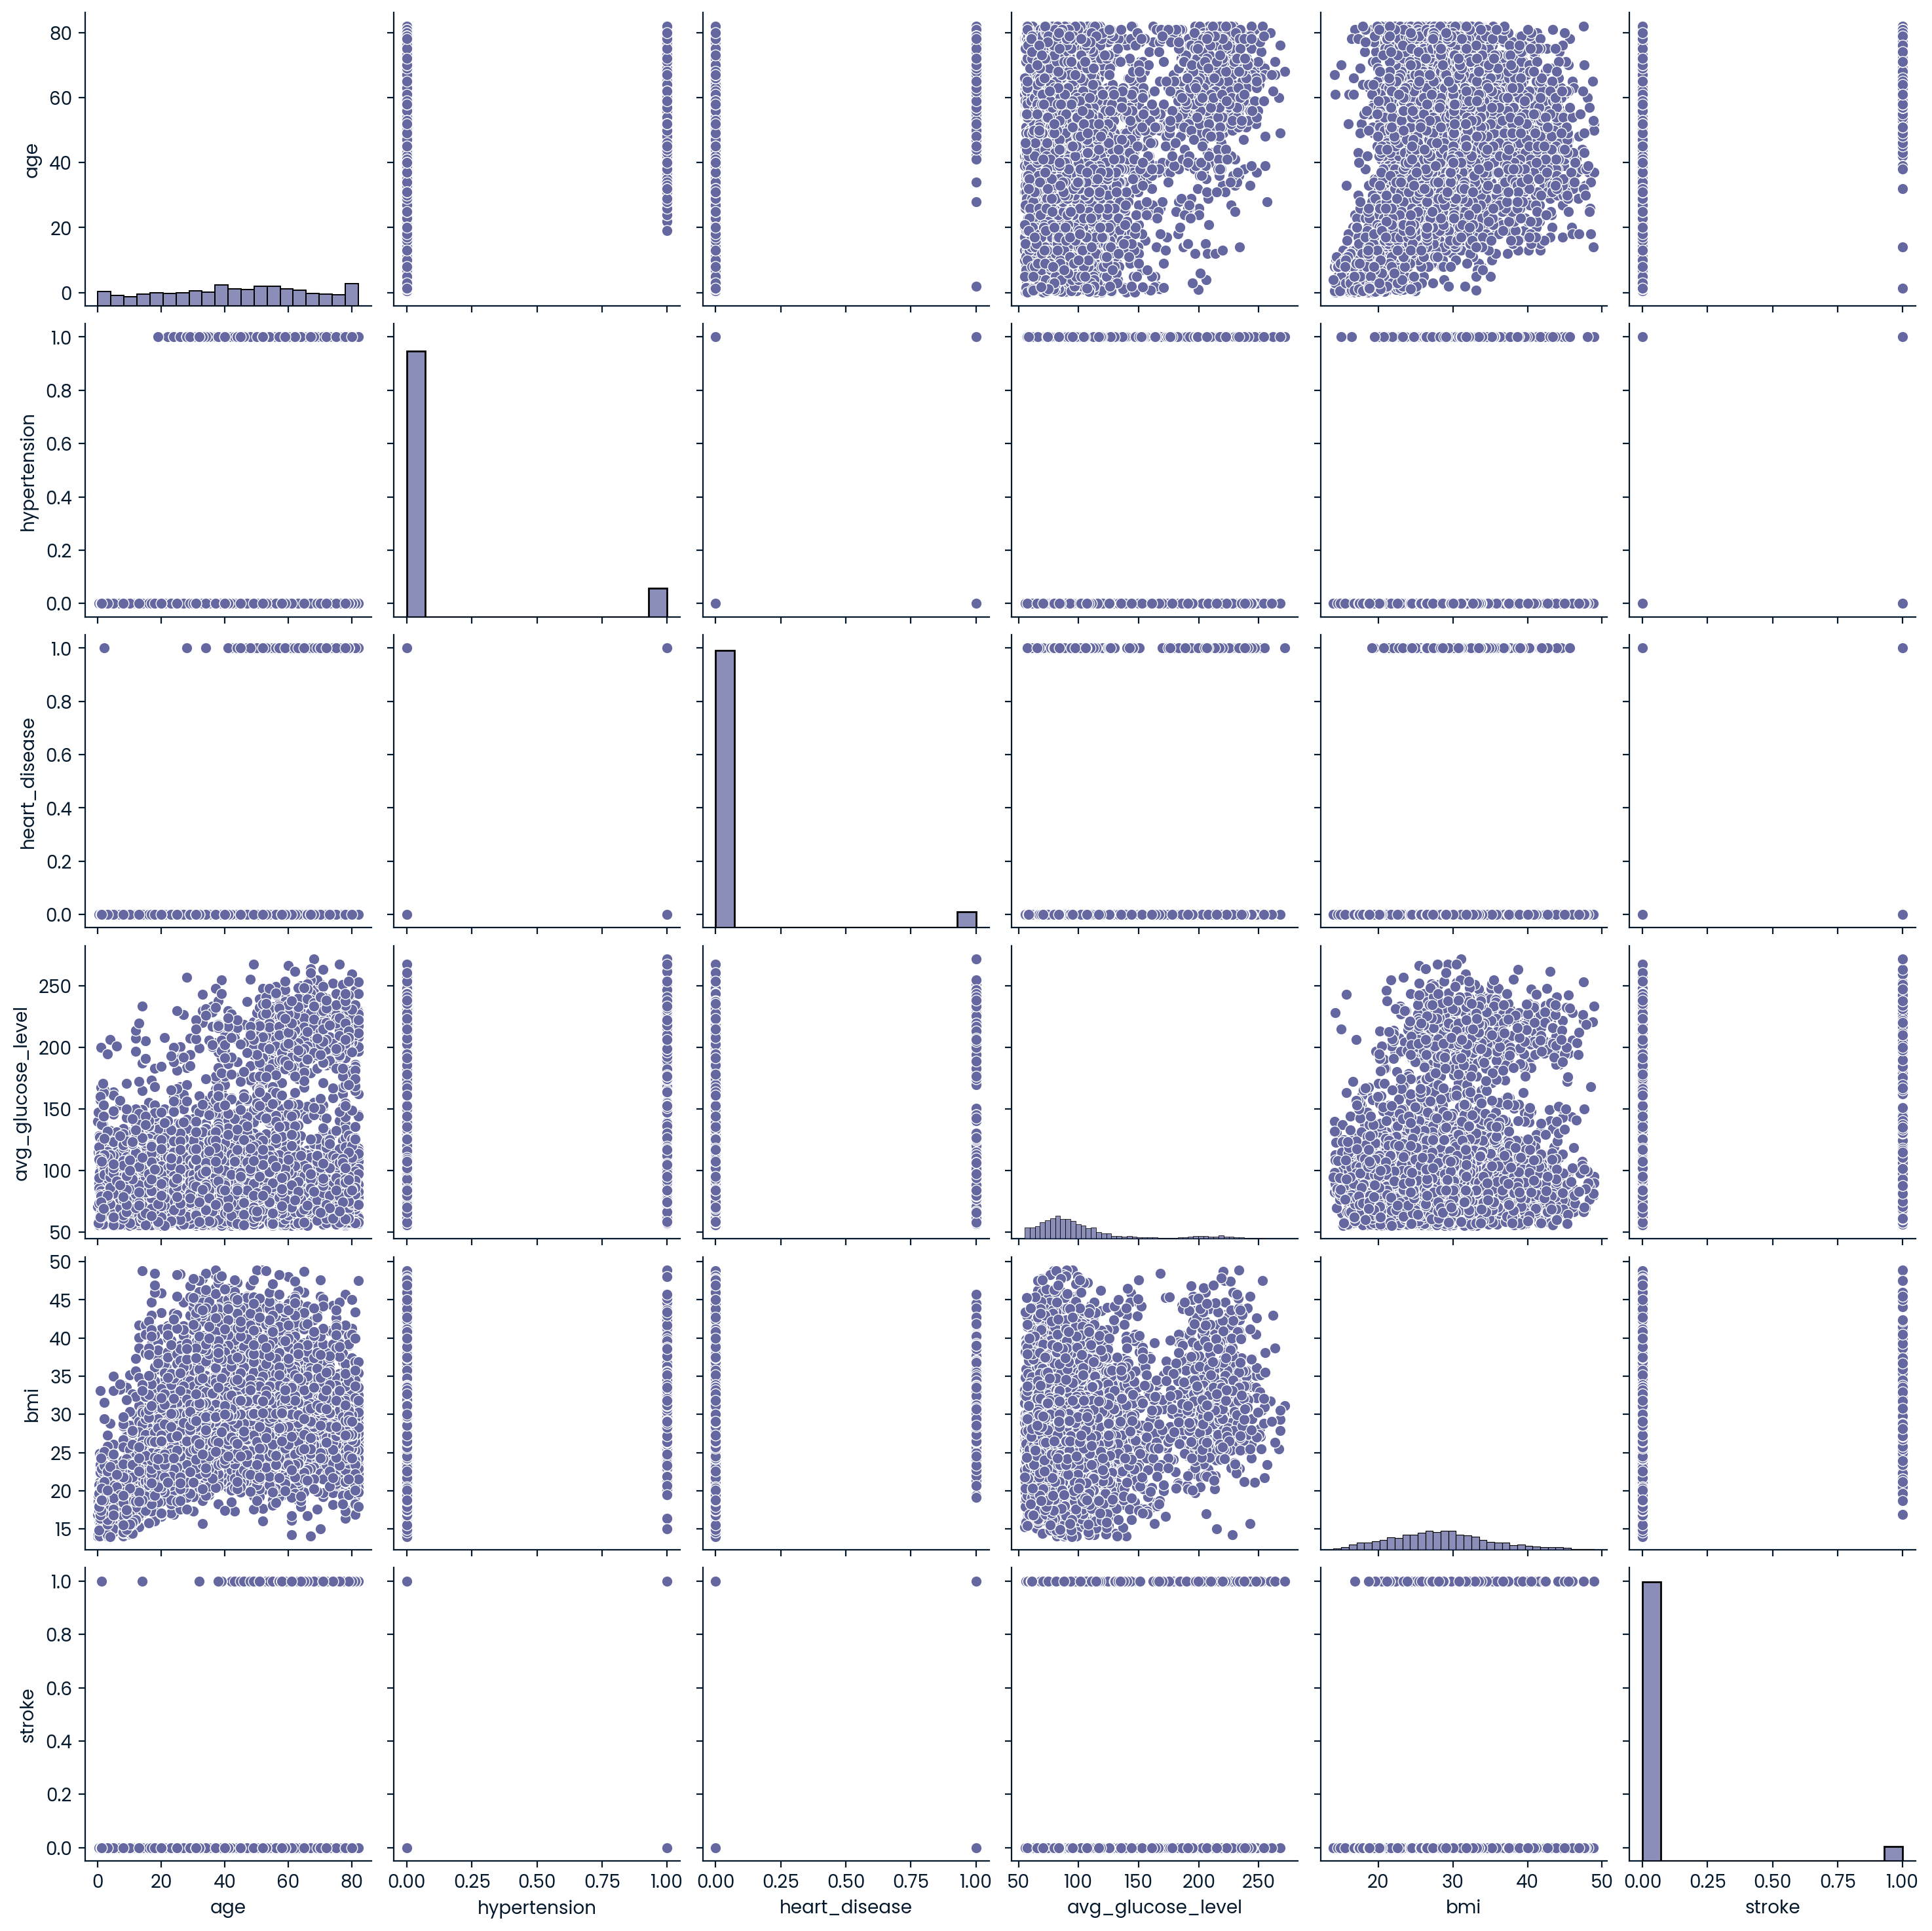

In [24]:
sns.pairplot(data = df)